In [1]:
#Uber Rides Data Analysis and Visualization

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
uber = pd.read_csv("UberDataset (1).csv")
uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
uber.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [5]:
#As we understood that there are a lot of null values in PURPOSE column, so for that we will me filling the null values with a NOT keyword.

uber['PURPOSE'].fillna("NOT", inplace=True)

In [6]:
#Changing the START_DATE and END_DATE to the date_time format so that further it can be use to do analysis.

uber['START_DATE'] = pd.to_datetime(uber['START_DATE'], 
                                       errors='coerce')
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'], 
                                     errors='coerce')

In [7]:
#Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night.
uber['date'] = pd.DatetimeIndex(uber['START_DATE']).date
uber['time'] = pd.DatetimeIndex(uber['START_DATE']).hour

#changing into categories of day and night
uber['day-night'] = pd.cut(x=uber['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

uber.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [8]:
uber.dropna(inplace=True)

In [9]:
uber.drop_duplicates(inplace=True)

In [10]:
obj = (uber.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = uber[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

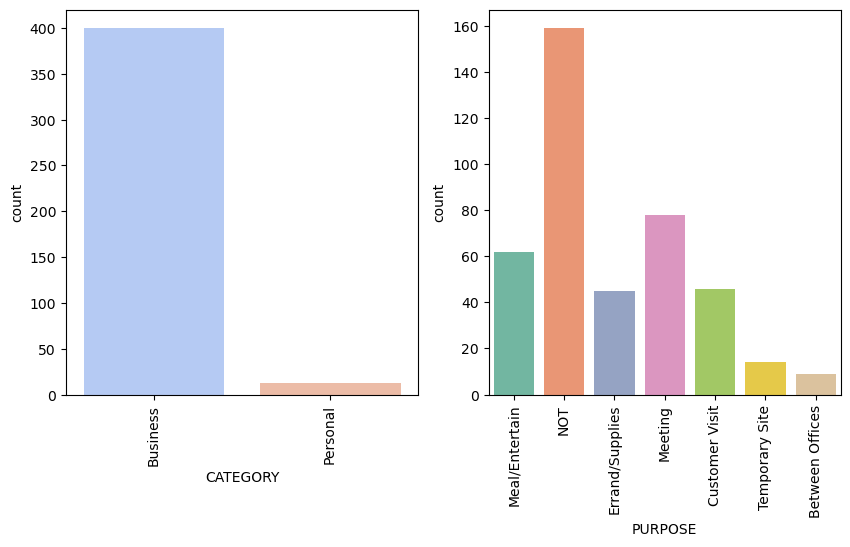

In [11]:
#1.Count plot for two categorical data CATEGORY and PURPOSE
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x=uber['CATEGORY'],palette='coolwarm')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x=uber['PURPOSE'],palette='Set2')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'Morning'),
  Text(1, 0, 'Afternoon'),
  Text(2, 0, 'Evening'),
  Text(3, 0, 'Night')])

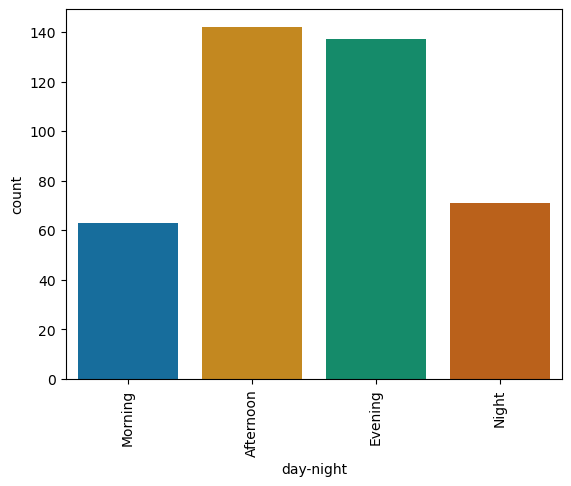

In [12]:
#2.Number of rides in day-night column
sns.countplot(x='day-night',palette='colorblind',data=uber)
plt.xticks(rotation=90)

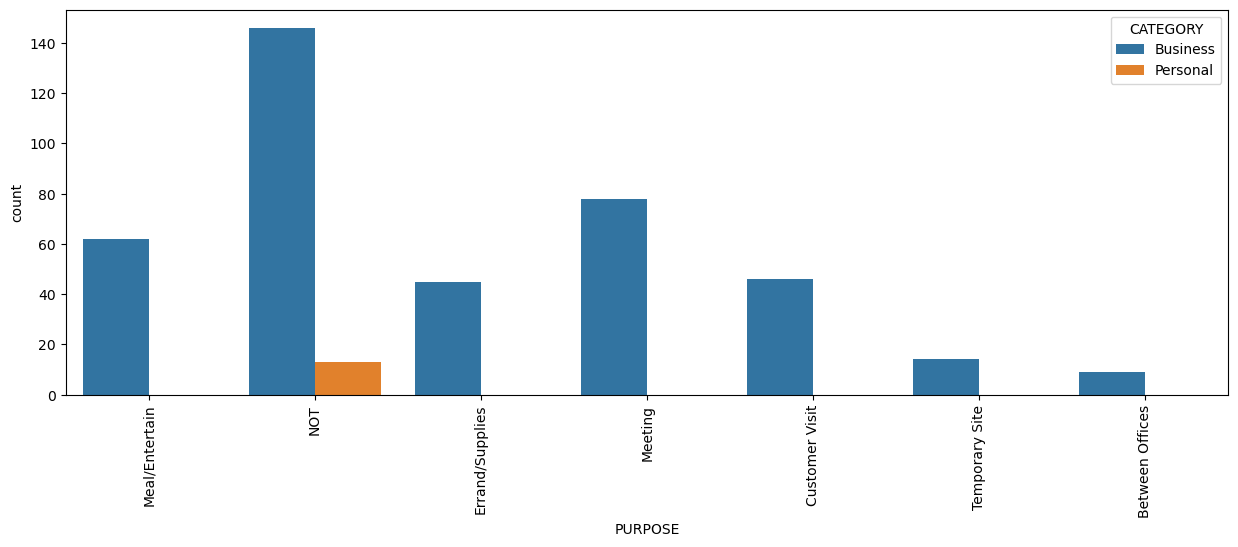

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(data=uber, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

<Axes: >

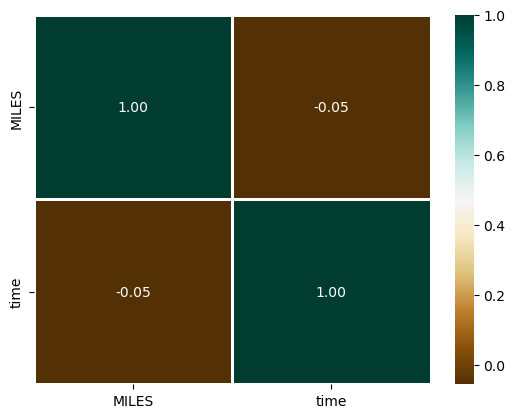

In [14]:
numeric_dataset = uber.select_dtypes(include=['number'])

sns.heatmap(numeric_dataset.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)


In [16]:
uber['MONTH'] = pd.DatetimeIndex(uber['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
uber["MONTH"] = uber.MONTH.map(month_label)

mon = uber.MONTH.value_counts(sort=False)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

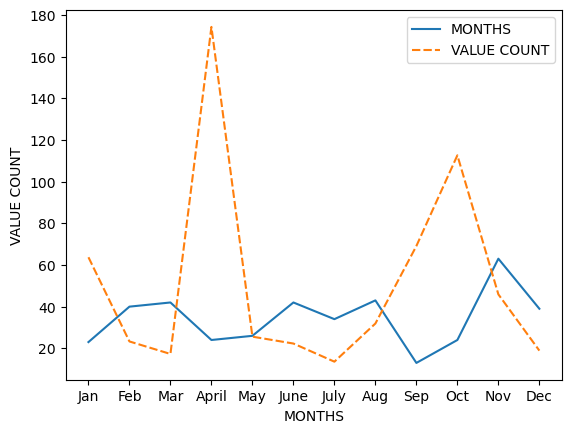

In [17]:
#3.
Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": uber.groupby('MONTH',
                                                  sort=False)['MILES'].max()})

p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [18]:
uber['DAY'] = uber.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
uber['DAY'] = uber['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

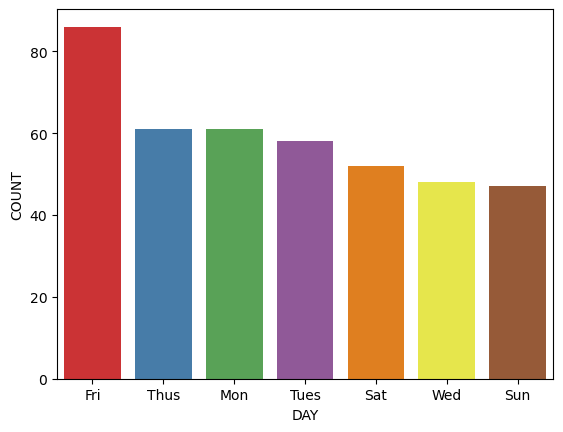

In [19]:
#4.Day vise uber rides 
day_label = uber.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label,palette='Set1');
plt.xlabel('DAY')
plt.ylabel('COUNT')

<Axes: ylabel='MILES'>

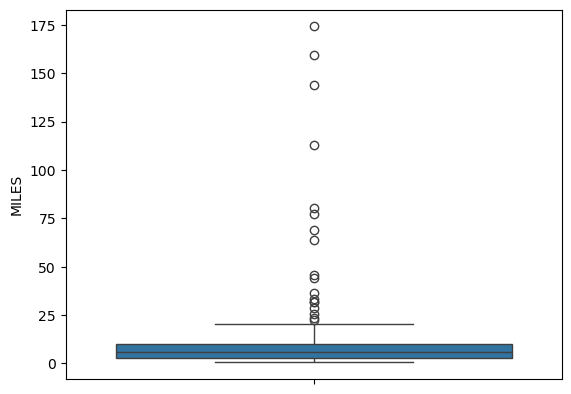

In [20]:
sns.boxplot(uber['MILES'])

<Axes: xlabel='MILES', ylabel='Density'>

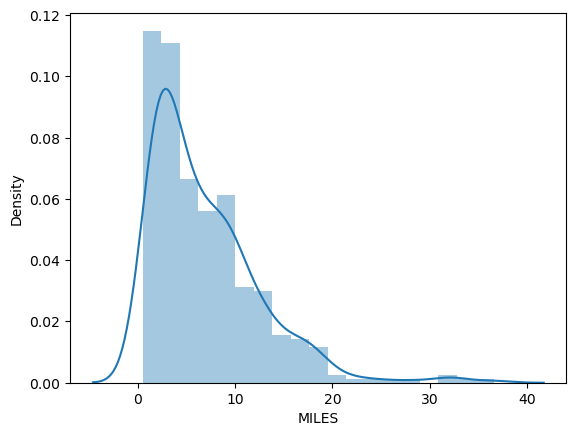

In [21]:
#5.Miles Density
sns.distplot(uber[uber['MILES']<40]['MILES'])

In [22]:
#Conclusion from the above visualization is given below
#1.Most of uber rides taken by Business category and purpose is meetings and meal/entertain.
#2.In Afternoon the number of uber ride taken is maximum.
#3.The counts are very irregular,Still its very clear that the counts are very less during Nov, Dec, Jan.
#4.the number of rides taken on friday is more than rest of the days
#5.Most of the cabs booked for the distance of 4-5 miles,Majorly people chooses cabs for the distance of 0-20 miles,For distance more than 20 miles cab counts is nearly negligible.